#1、摘要任務
對文字內容進行總結摘要。這是多個開發團隊在不同軟體應用中所建構的功能。本課程中，學習如何以程式設計的方式來實現文字摘要任務


In [ ]:
!pip install openai

In [ ]:
from openai import OpenAI
client = OpenAI(api_key = "")

In [ ]:
def get_completion(prompt, temperature=0):
  messages = [{"role": "user", "content": prompt}]
  response = client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=messages,
    temperature=temperature
  )
  return response.choices[0].message.content

##1-1生成評論的摘要
如果你正在建構一個電子商務網站，並且有大量的評論，需要一個工具來總結冗長的評論，讓你可以更快速地瀏覽更多的評論，更進一步地了解所有客戶的想法。
因此，需要有一個生成摘要的提示。你的任務是對電子商務網站上的產品評論生成一個簡短的評論摘要，最多使用 30 個單字。


In [ ]:
prod_review = """
Got this panda plush toy for my daughter's birthday, \
who loves it and takes it everywhere. It's soft and \
super cute, and its face has a friendly look. It's \
a bit small for what I paid though. I think there \
might be other options that are bigger for the \
same price. It arrived a day earlier than expected, \
so I got to play with it myself before I gave it \
to her.
"""


In [ ]:
prompt = f"""
Your task is to generate a short summary of a product \ review from an ecommerce site.

Summarize the review below, delimited by triple backticks, in at most 30 words.

Review: ```{prod_review}``` """

response = get_completion(prompt)
print(response)


Soft and cute panda plush toy loved by a child, but a bit small for the price. Arrived early.


##1-2指定資訊的摘要
舉例來說，如果我要向運輸部門提供回饋，那麼我的關注點就集中在商品的運輸和交付方面，因此對提示進行修改如下

In [ ]:
prompt = f"""
Your task is to generate a short summary of a product \ review from an ecommerce site to give feedback to the \ Shipping deparmtment.

Summarize the review below, delimited by triple
backticks, in at most 30 words, and focusing on any aspects \ that mention shipping and delivery of the product.

Review: ```{prod_review}``` """
response = get_completion(prompt)
print(response)

The customer is happy with the product but mentions that it is smaller than expected. They also mention that the shipping was faster than expected.


如果我們不想向運輸部門，而是想向定價部門提供回饋。定價部門負責確定產品的價格，所以我要告訴它關注與價格和價值感知相關的內容。

In [ ]:
prompt = f"""
Your task is to generate a short summary of a product \
review from an ecommerce site to give feedback to the \
pricing deparmtment, responsible for determining the \
price of the product.

Summarize the review below, delimited by triple \
backticks, in at most 30 words, and focusing on any aspects \
that are relevant to the price and perceived value.

Review: ```{prod_review}``` """

response = get_completion(prompt)
print(response)


The panda plush toy is loved by the daughter, but the reviewer feels it is overpriced as there might be larger options available for the same price.


## 1-3提取指定的資訊
在這些總結中，除了生成了與運輸相關的資訊，也有一些其它的資訊，你可以決定這些資訊是否有幫助。根據你想要總結的方式，你也可以要求它只是提取資訊而非進行總結。這裡有一個提示，它說你的任務是提取相關資訊並給運輸部門回饋。


In [ ]:
prompt = f"""
Your task is to extract relevant information from \
a product review from an ecommerce site to give \
feedback to the Shipping department.
From the review below, delimited by triple quotes \
extract the information relevant to shipping and \
delivery. Limit to 30 words.

Review: ```{prod_review}``` """

response = get_completion(prompt)
print(response)


The relevant information about shipping and delivery from the review is: "It arrived a day earlier than expected."


##1-4多筆評論的摘要
在工作流程中使用它來幫助總結多篇評論，使其更容易閱讀。

In [ ]:
review_1 = prod_review

# review for a standing lamp
review_2 = """
Needed a nice lamp for my bedroom, and this one \ had additional storage and not too high of a price \ point. Got it fast - arrived in 2 days. The string \
to the lamp broke during the transit and the company \ happily sent over a new one. Came within a few days \ as well. It was easy to put together. Then I had a \ missing part, so I contacted their support and they \ very quickly got me the missing piece! Seems to me \
to be a great company that cares about their customers \ and products.
"""

# review for an electric toothbrush
review_3 = """
My dental hygienist recommended an electric toothbrush, \ which is why I got this. The battery life seems to be \ pretty impressive so far. After initial charging and \ leaving the charger plugged in for the first week to \ condition the battery, I've unplugged the charger and \ been using it for twice daily brushing for the last \
3 weeks all on the same charge. But the toothbrush head \
is too small. I’ve seen baby toothbrushes bigger than \ this one. I wish the head was bigger with different \ length bristles to get between teeth better because \ this one doesn’t. Overall if you can get this one \
around the $50 mark, it's a good deal. The manufactuer's \ replacements heads are pretty expensive, but you can \
get generic ones that're more reasonably priced. This \ toothbrush makes me feel like I've been to the dentist \ every day. My teeth feel sparkly clean!
"""

# review for a blender
review_4 = """
So, they still had the 17 piece system on seasonal \ sale for around $49 in the month of November, about \ half off, but for some reason (call it price gouging) \ around the second week of December the prices all went \ up to about anywhere from between $70-$89 for the same \ system. And the 11 piece system went up around $10 or \ so in price also from the earlier sale price of $29. \
So it looks okay, but if you look at the base, the part \ where the blade locks into place doesn’t look as good \ as in previous editions from a few years ago, but I \ plan to be very gentle with it (example, I crush \
very hard items like beans, ice, rice, etc. in the \ blender first then pulverize them in the serving size \ I want in the blender then switch to the whipping \
blade for a finer flour, and use the cross cutting blade \ first when making smoothies, then use the flat blade \
if I need them finer/less pulpy). Special tip when making \ smoothies, finely cut and freeze the fruits and \ vegetables (if using spinach-lightly stew soften the \ spinach then freeze until ready for use-and if making \ sorbet, use a small to medium sized food processor) \
that you plan to use that way you can avoid adding so \ much ice if at all-when making your smoothie. \
After about a year, the motor was making a funny noise. \ I called customer service but the warranty expired \ already, so I had to buy another one. FYI: The overall \ quality has gone done in these types of products, so \ they are kind of counting on brand recognition and \ consumer loyalty to maintain sales. Got it in about \
two days. """

reviews = [review_1, review_2, review_3, review_4]
for i in range(len(reviews)):
  prompt = f"""
Your task is to generate a short summary of a product \ review from an ecommerce site.
Summarize the review below, delimited by triple \ backticks in at most 20 words.
Review: ```{reviews[i]}``` """
  response = get_completion(prompt)
  print(i, response, "\n")



0 Soft and cute panda plush toy loved by daughter, but small for the price. Arrived early. 

1 Affordable lamp with storage, fast delivery, excellent customer service, and easy assembly. Great company that values customers. 

2 The reviewer recommends the electric toothbrush for its impressive battery life, but criticizes the small brush head. 

3 The reviewer mentions a price increase, a slight flaw in the blade lock, and a motor issue after a year. 



#2、推理任務
這些任務看成是模型將文字作為輸入並進行某種分析。這可以是提取標籤，提取名字，理解文字的情感，等等

## 2-1文字情緒分析
如果你想對一段文字提取正面或負面的情緒，在傳統的機器學習工作流程中，你必須收集標籤資料集，訓練一個模型，將模型部署在雲端的某個地方，並進行推斷。這種方法可以極佳地工作，但這個過程需要做很多費力的工作。此外，對於每一項任務，例如情感分析、提取姓名或其他任務，你都必須為其訓練和部署一個單獨的模型。
大型語言模型的好處是，對於許多這樣的任務，你只需要撰寫一個提示，就可以讓它馬上生成結果，這極大地加快了應用程式開發的速度。而且你可以只使用一個模型、一個 API 來執行許多不同的任務，而不需要搞清楚如何訓練和部署許多不同的模型。


In [ ]:
lamp_review = """
Needed a nice lamp for my bedroom, and this one had \
additional storage and not too high of a price point. \
Got it fast. The string to our lamp broke during the \
transit and the company happily sent over a new one. \
Came within a few days as well. It was easy to put \
together. I had a missing part, so I contacted their \
support and they very quickly got me the missing piece! \
Lumina seems to me to be a great company that cares \
about their customers and products!!
"""

In [ ]:
prompt = f"""
What is the sentiment of the following product review, which is delimited with triple backticks?

Review text: '''{lamp_review}''' """
response = get_completion(prompt)
print(response)


The sentiment of the product review is positive.


## 2-2控制輸出的樣式
舉出一個更簡潔的回答，以便後期處理，我可以在這個提示中添加另一行指令，用一個單字舉出答案，無論是正面的還是負面的

In [ ]:
prompt = f"""
What is the sentiment of the following product review, which is delimited with triple backticks?

Give your answer as a single word, either "positive" \ or "negative".

Review text: '''{lamp_review}''' """
response = get_completion(prompt)
print(response)


positive


在這裡，我讓它舉出這條評論的作者所表達的情緒清單，清單內容不超過五項

In [ ]:
prompt = f"""
Identify a list of emotions that the writer of the \ following review is expressing. Include no more than \ five items in the list. Format your answer as a list of \ lower-case words separated by commas.

Review text: '''{lamp_review}''' """
response = get_completion(prompt)
print(response)


satisfied, pleased, grateful, impressed, happy


客戶支援部門來說，了解特定使用者是否對產品感到非常不滿是很重要的工作。所以你可能會遇到類似這樣的不同的分類問題：“下面這條評論的作者是否在表達憤怒？”

In [ ]:
prompt = f"""
Is the writer of the following review expressing anger?\ The review is delimited with triple backticks. \
Give your answer as either yes or no.

Review text: '''{lamp_review}''' """
response = get_completion(prompt)
print(response)


No


## 2-3輸出JSON格式
資訊提取是自然語言處理（NLP）的一部分，它涉及到提取一段文字，並從文字中提取你想知道的某些東西。在這個提示中，我要求它提取以下資訊：購買的物品和製造該物品的公司名稱。同樣，如果你試圖對一個網上購物電子商務網站上的大量評論進行總結，那麼對 收集的大量評論來說，找出這些評論所涉及的商品可能會很有用。可以分析評論中 的內容，找出涉及產品的製造商，推斷正面或負面的情緒，由此來追蹤特定商品或 特定製造商的正面或負面情緒的變化趨勢。
在這個例子中，我將要求它以 JSON 格式進行格式化的輸出 ，以 item 和 brand作為關鍵字。


In [ ]:
prompt = f"""
Identify the following items from the review text:
-	Item purchased by reviewer
-	Company that made the item

The review is delimited with triple backticks. \
Format your response as a JSON object with \
"Item" and "Brand" as the keys.
If the information isn't present, use "unknown" \
as the value.
Make your response as short as possible.

Review text: '''{lamp_review}''' """
response = get_completion(prompt)
print(response)


{
  "Item": "lamp",
  "Brand": "Lumina"
}


##2-4整合多個任務
撰寫一個提示來同時提取所有這些資訊。舉例來說，辨識以下的項目：提取情緒，是否在表達憤怒，購買的商品，商品的製造商。然後，我還將要求它將憤怒情緒表示為布林值的格式

In [ ]:
prompt = f"""
Identify the following items from the review text:
-	Sentiment (positive or negative)
-	Is the reviewer expressing anger? (true or false)
-	Item purchased by reviewer
-	Company that made the item

The review is delimited with triple backticks. \ Format your response as a JSON object with \ "Sentiment", "Anger", "Item" and "Brand" as the keys.
If the information isn't present, use "unknown" \ as the value.
Make your response as short as possible. Format the Anger value as a boolean.

Review text: '''{lamp_review}''' """
response = get_completion(prompt)
print(response)


{
  "Sentiment": "positive",
  "Anger": false,
  "Item": "lamp",
  "Brand": "Lumina"
}


##2-5文字主題推論
給定一段很長的文字，這段文字是關於什麼的？有哪些主題？ 這是一篇虛構的報紙文章，關於政府工作人員對他們所工作機構的感受，最近由政府進行了一項調查，結果是NASA 是一個受歡迎的部門，滿意度很高


In [ ]:
story = """
In a recent survey conducted by the government,
public sector employees were asked to rate their level of satisfaction with the department they work at.
The results revealed that NASA was the most popular department with a satisfaction rating of 95%.

One NASA employee, John Smith, commented on the findings, stating, "I'm not surprised that NASA came out on top.
It's a great place to work with amazing people and incredible opportunities. I'm proud to be a part of such an innovative organization."

The results were also welcomed by NASA's management team, with Director Tom Johnson stating, "We are thrilled to
hear that our employees are satisfied with their work at NASA.
We have a talented and dedicated team who work tirelessly to achieve our goals, and it's fantastic to see that their hard work is paying off."

The survey also revealed that the
Social Security Administration had the lowest satisfaction rating, with only 45% of employees indicating they were satisfied with their job. The government has pledged to address the concerns raised by employees in the survey and
work towards improving job satisfaction across all departments. """


確定以下文字中討論的五個主題，把每一項都寫成一到兩個單字，表示為用逗點分隔的列表。

In [ ]:
prompt = f"""
Determine five topics that are being discussed in the \
following text, which is delimited by triple backticks.

Make each item one or two words long.
Format your response as a list of items separated by commas. Text sample: '''{story}'''
"""
response = get_completion(prompt)
print(response)


1. Government survey
2. Employee satisfaction
3. NASA
4. Social Security Administration
5. Job satisfaction improvement


##1-6文字主題索引
如果你有一個文章的集合，並提取主題，那麼還可以使用大型語言模型來幫助你索引不同的主題。讓我使用一個稍微不同的主題清單。舉例來說，我們是一個新聞網站或其他什麼，這些都是我們追蹤的話題，NASA，地方政府，工程，員工滿意度，聯邦政府。


In [ ]:
topic_list = [
"nasa", "local government", "engineering", "employee satisfaction", "federal government"
]


如果想弄清楚，給定一篇新聞報導，這篇新聞涉及哪些主題。可以使用這樣一個提示：確定以下主題清單中的每個專案是否都是下面文字中的主題，將答案表示為每個主題的 0/1 的list。


In [ ]:
prompt = f"""
Determine whether each item in the following list of \ topics is a topic in the text below, which
is delimited with triple backticks.

Give your answer as list with 0 or 1 for each topic.\
List of topics: {", ".join(topic_list)}
Text sample: '''{story}''' """
response = get_completion(prompt)
print(response)


[1, 0, 0, 1, 1]


#2、轉換任務
將輸入轉為不同的格式，輸入一種語言的文字，將其轉換或翻譯為另一種語言，或幫助進行拼寫和語法的檢查和修改。因此，將一段不完全符合語法的文字作為輸入，可以讓它幫助你 x 糾正拼寫和語法。或用來轉換文字格式，例如輸入 HTML ，讓它輸出 JSON格式的文字。

##2-1文字翻譯
大型語言模型是在許多來源的大量文字上訓練出來的，其中很多內容來自網際網路，這當然會有許多不同的語言。因此， 這使模型具有翻譯能力。模型以不同程度的熟練掌握數百種語言

In [ ]:
prompt = f"""
Translate the following English text to Traditional Chinese: \
```Hi, I would like to order a blender``` """
response = get_completion(prompt)
print(response)


嗨，我想要訂購一台攪拌機。


In [ ]:
prompt = f"""
Tell me which language this is:
```Combien coûte le lampadaire?``` """
response = get_completion(prompt)
print(response)


This language is French.


在一些語言中，翻譯可能會因說話者與聽眾的關係而變化。你也可以向語言模型解釋這一點，這樣它就能進行相應的翻譯。在這個例子中，我們提示要求，將以下文字翻譯成中文，分別用正式的和非正式的用法表達

In [ ]:
prompt = f"""
Translate the following text to Taiwan Chinese in both the \
formal and informal forms:
'would you like to order a drink?' """
response = get_completion(prompt)
print(response)


Formal: 您要點飲料嗎？
Informal: 你要點飲料嗎？


##1-2通用翻譯器
假設我們負責一家跨國電子商務公司，使用者發來的資訊將是各種不同的語言，因此他們會用各種不同的語言，告訴我們關於 IT 的問題。因此，我們需要一個通用的翻譯器。
首先，我們將貼上一個各種不同語言的使用者資訊的清單，然後我們將迴圈遍歷每一條使用者訊息。


In [ ]:
user_messages = ["La performance du système est plus lente que d'habitude.",
          "Mi monitor tiene píxeles que no se iluminan.","Il mio mouse non funziona",
          "Mój klawisz Ctrl jest zepsuty",
          "我的屏幕在闪烁"
]


In [ ]:
for issue in user_messages:
  prompt = f"Tell me what language this is: ```{issue}```"
  lang = get_completion(prompt)
  print(f"Original message ({lang}): {issue}")

  prompt = f"""
Translate the following text to English \
and Traditional Chinese: ```{issue}```
"""
  response = get_completion(prompt)
  print(response, "\n")


Original message (The language is French.): La performance du système est plus lente que d'habitude.
The system performance is slower than usual.
系統的表現比平常慢。 

Original message (The language is Spanish.): Mi monitor tiene píxeles que no se iluminan.
My monitor has pixels that do not light up.
我的显示器有一些像素点不亮。 

Original message (The language is Italian.): Il mio mouse non funziona
English: My mouse is not working.
Traditional Chinese: 我的鼠標不工作。 

Original message (The language is Polish.): Mój klawisz Ctrl jest zepsuty
My Ctrl key is broken
我的Ctrl键坏了 

Original message (The language is Chinese.): 我的屏幕在闪烁
English: "My screen is flickering."

Traditional Chinese: "我的屏幕在閃爍" 



#1-3語氣和風格變換
寫作可以根據預期的受眾不同而變化，我給同事或教授寫郵件的方式，顯然會與我給弟弟發簡訊的方式大不相同。ChatGPT 也可以幫助產生不同的語氣。

In [ ]:
prompt = f"""
Translate the following from slang to a business letter: 'Dude, This is Joe, check out this spec on this standing lamp.' """
response = get_completion(prompt)
print(response)


Dear Sir/Madam,

I hope this letter finds you well. My name is Joe, and I am writing to bring your attention to a specification document regarding a standing lamp. 

I kindly request that you take a moment to review the attached spec, as it provides detailed information about the features and qualities of the aforementioned standing lamp. 

Thank you for your time and consideration. I look forward to discussing this further with you.

Yours sincerely,
Joe


#1-6文字格式轉換
不同的格式之間進行轉換，比如從 JSON 到 HTML，XML， markdown	，	等	等	。在提示中，我們將描述輸入和輸出格式。這裡有一個例子。因此，我們一個 JSON 格式，包含一個餐廳員工的名單，包括他們的名字和電子郵件。在提示中，我們要求模型將其從 JSON 轉為 HTML，提示是：將以下的 Python字典從 JSON 轉為具有列頭和標題行的 HTML 表格。然後我們將從模型中獲得響應並將其列印出來。

In [ ]:
data_json = { "resturant employees" :[
{"name":"Shyam", "email":"shyamjaiswal@gmail.com"},
{"name":"Bob", "email":"bob32@gmail.com"},
{"name":"Jai", "email":"jai87@gmail.com"}
]}

prompt = f"""
Translate the following python dictionary from JSON to an HTML \
table with column headers and title: {data_json}
"""
response = get_completion(prompt)
print(response)

<!DOCTYPE html>
<html>
<head>
<style>
table {
  font-family: arial, sans-serif;
  border-collapse: collapse;
  width: 100%;
}

td, th {
  border: 1px solid #dddddd;
  text-align: left;
  padding: 8px;
}

tr:nth-child(even) {
  background-color: #dddddd;
}
</style>
</head>
<body>

<h2>Restaurant Employees</h2>

<table>
  <tr>
    <th>Name</th>
    <th>Email</th>
  </tr>
  <tr>
    <td>Shyam</td>
    <td>shyamjaiswal@gmail.com</td>
  </tr>
  <tr>
    <td>Bob</td>
    <td>bob32@gmail.com</td>
  </tr>
  <tr>
    <td>Jai</td>
    <td>jai87@gmail.com</td>
  </tr>
</table>

</body>
</html>


In [ ]:
from IPython.display import display, Markdown, Latex, HTML, JSON
display(HTML(response))

Name,Email
Shyam,shyamjaiswal@gmail.com
Bob,bob32@gmail.com
Jai,jai87@gmail.com


##1-6拼寫檢查/語法檢查
這裡有一些常見的語法和拼寫問題的例子，這個例子展示語言模型如何幫助解決這些問題。
我將貼上一個有一些語法或拼寫錯誤的句子清單，然後我們將迴圈遍歷每個句子，要求模型校對並進行糾正。我們要使用一些分隔符號。最後獲取回應並將其列印出來。


In [ ]:
text = [
"The girl with the black and white puppies have a ball.", # The girl has a ball.
"Yolanda has her notebook.", # ok
"Its going to be a long day. Does the car need it’s oil changed?", #Homonyms
"Their goes my freedom. There going to bring they’re suitcases.", # Homonyms
"Your going to need you’re notebook.", # Homonyms
"That medicine effects my ability to sleep. Have you heard of the butt erfly affect?", # Homonyms
"This phrase is to cherck chatGPT for speling abilitty" # spelling
]
for t in text:
  prompt = f"Proofread and correct: ```{t}```"
  response = get_completion(prompt)
  print(response)


The girl with the black and white puppies has a ball.
Yolanda has her notebook.
"It's going to be a long day. Does the car need its oil changed?"
There goes my freedom. They're going to bring their suitcases.
"You're going to need your notebook."
Proofread and corrected: "That medicine affects my ability to sleep. Have you heard of the butterfly effect?"
This phrase is to check chatGPT for spelling ability.


可以說，校對和糾正以下文字， 並重寫整個校正後的版本。如果沒有發現任何錯誤，只需輸出“沒有發現錯誤”。

In [ ]:
text = [
"The girl with the black and white puppies have a ball.", # The girl has a ball.
"Yolanda has her notebook.", # ok
"Its going to be a long day. Does the car need it’s oil changed?", # Homonyms
"Their goes my freedom. There going to bring they’re suitcases.", # Homonyms
"Your going to need you’re notebook.", # Homonyms
"That medicine effects my ability to sleep. Have you heard of the butt erfly affect?", # Homonyms
"This phrase is to cherck chatGPT for speling abilitty" # spelling
]
for t in text:
  prompt = f"""Proofread and correct the following text and rewrite the corrected version. If you don't find and errors, just say "No errors found". Don't use
any punctuation around the text:
```{t}```"""
  response = get_completion(prompt)
  print(response)


The girl with the black and white puppies has a ball.
No errors found.
No errors found.
There goes my freedom. They're going to bring their suitcases.
No errors found.
That medicine affects my ability to sleep. Have you heard of the butterfly effect?
No errors found.


透過一點點迭代地進行提示開發，你能夠找到一個更加可靠的提示方式，每一次都能更進一步地工作。現在我們再舉一個例子。在你把文字發佈到公共討論區之前，檢查一下總是很有 用的。因此，我們將舉一個檢查評論的例子。下面是一篇關於毛絨熊貓玩具的評論。我們將要求模型校對和糾正這篇評論。


In [ ]:
text = f"""
Got this for my daughter for her birthday cuz she keeps taking \ mine from my room. Yes, adults also like pandas too. She takes \ it everywhere with her, and it's super soft and cute. One of the \ ears is a bit lower than the other, and I don't think that was \
designed to be asymmetrical. It's a bit small for what I paid for it \ though. I think there might be other options that are bigger for \ the same price. It arrived a day earlier than expected, so I got \ to play with it myself before I gave it to my daughter.
"""
prompt = f"proofread and correct this review: ```{text}```"
response = get_completion(prompt)
print(response)


Got this for my daughter for her birthday because she keeps taking mine from my room. Yes, adults also like pandas too. She takes it everywhere with her, and it's super soft and cute. However, one of the ears is a bit lower than the other, and I don't think that was designed to be asymmetrical. Additionally, it's a bit small for what I paid for it. I believe there might be other options that are bigger for the same price. On the positive side, it arrived a day earlier than expected, so I got to play with it myself before I gave it to my daughter.


In [ ]:
! pip install redlines
from redlines import Redlines

diff = Redlines(text,response)
display(Markdown(diff.output_markdown))


Got this for my daughter for her birthday <span style='color:red;font-weight:700;text-decoration:line-through;'>cuz </span><span style='color:green;font-weight:700;'>because </span>she keeps taking <span style='color:red;font-weight:700;text-decoration:line-through;'>\ </span>mine from my room. Yes, adults also like pandas too. She takes <span style='color:red;font-weight:700;text-decoration:line-through;'>\ </span>it everywhere with her, and it's super soft and cute. <span style='color:red;font-weight:700;text-decoration:line-through;'>One </span><span style='color:green;font-weight:700;'>However, one </span>of the <span style='color:red;font-weight:700;text-decoration:line-through;'>\ </span>ears is a bit lower than the other, and I don't think that was designed to be asymmetrical. <span style='color:red;font-weight:700;text-decoration:line-through;'>It's </span><span style='color:green;font-weight:700;'>Additionally, it's </span>a bit small for what I paid for <span style='color:red;font-weight:700;text-decoration:line-through;'>it \ though. </span><span style='color:green;font-weight:700;'>it. </span>I <span style='color:red;font-weight:700;text-decoration:line-through;'>think </span><span style='color:green;font-weight:700;'>believe </span>there might be other options that are bigger for <span style='color:red;font-weight:700;text-decoration:line-through;'>\ </span>the same price. <span style='color:red;font-weight:700;text-decoration:line-through;'>It </span><span style='color:green;font-weight:700;'>On the positive side, it </span>arrived a day earlier than expected, so I got <span style='color:red;font-weight:700;text-decoration:line-through;'>\ </span>to play with it myself before I gave it to my daughter.

我們要求模型校對和更正這篇相同的評論，但也要求對內容進
行修改使其更有說服力，並確保它遵循 APA 風格。針對高級讀者。我們還將要求以
markdown 格式輸出。在這裡我們使用與原始評論相同的文字


In [ ]:
prompt = f"""
proofread and correct this review. Make it more compelling. Ensure it follows APA style guide and targets an advanced reader. Output in markdown format.
Text: ```{text}``` """
response = get_completion(prompt)
display(Markdown(response))


**Review of the Panda Plush Toy: A Perfect Gift for Panda Enthusiasts**

I purchased this adorable panda plush toy as a birthday gift for my daughter, who has a penchant for sneaking into my room and borrowing mine. Contrary to popular belief, adults can also appreciate the charm of pandas. This cuddly companion has quickly become her constant companion, accompanying her wherever she goes. 

The plush toy is undeniably soft and exudes an irresistible cuteness that is hard to resist. However, upon closer inspection, I noticed a slight asymmetry in the placement of the ears. While some may argue that this adds to its uniqueness, I personally believe it was not intended to be asymmetrical. 

One aspect that slightly disappointed me was the size of the toy in relation to its price. Although I was willing to pay a premium for this high-quality item, I expected it to be larger. It is worth noting that there may be alternative options available at the same price point that offer a more substantial size.

Despite this minor setback, I was pleasantly surprised by the prompt delivery of the plush toy. It arrived a day earlier than expected, allowing me to indulge in some playtime with it before presenting it to my daughter. This unexpected bonus further enhanced my overall satisfaction with the purchase.

In conclusion, the panda plush toy is a delightful gift for both children and adults who appreciate the allure of these magnificent creatures. Its softness and undeniable cuteness make it an irresistible companion. While the slight asymmetry and smaller size may be minor drawbacks, the early delivery and the joy it brings to my daughter's life outweigh these concerns. For those seeking a charming and endearing panda plush toy, this option is certainly worth considering.

#2、擴充任務
將一小段簡短的文字，例如一組說明或主題清單，用大型語言模型生成一段更長的文字，例如關於某個主題的電子郵件或一篇文章

##2-1自動回覆郵件
使用語言模型，根據客戶的評論和評論的情緒，給客戶發送一封訂製的的電子郵件

In [ ]:
# given the sentiment from the lesson on "inferring",
# and the original customer message, customize the email
sentiment = "negative"

# review for a blender
review = f"""
So, they still had the 17 piece system on seasonal \ sale for around $49 in the month of November, about \ half off, but for some reason (call it price gouging) \ around the second week of December the prices all went \ up to about anywhere from between $70-$89 for the same \ system. And the 11 piece system went up around $10 or \ so in price also from the earlier sale price of $29. \
So it looks okay, but if you look at the base, the part \ where the blade locks into place doesn’t look as good \ as in previous editions from a few years ago, but I \ plan to be very gentle with it (example, I crush \
very hard items like beans, ice, rice, etc. in the \ blender first then pulverize them in the serving size \ I want in the blender then switch to the whipping \
blade for a finer flour, and use the cross cutting blade \ first when making smoothies, then use the flat blade \
if I need them finer/less pulpy). Special tip when making \ smoothies, finely cut and freeze the fruits and \ vegetables (if using spinach-lightly stew soften the \ spinach then freeze until ready for use-and if making \ sorbet, use a small to medium sized food processor) \
that you plan to use that way you can avoid adding so \ much ice if at all-when making your smoothie. \
After about a year, the motor was making a funny noise. \ I called customer service but the warranty expired \ already, so I had to buy another one. FYI: The overall \ quality has gone done in these types of products, so \ they are kind of counting on brand recognition and \
consumer loyalty to maintain sales. Got it in about \ two days.
"""
prompt = f"""
You are a customer service AI assistant.
Your task is to send an email reply to a valued customer. Given the customer email delimited by ```, \
Generate a reply to thank the customer for their review. If the sentiment is positive or neutral, thank them for \ their review.
If the sentiment is negative, apologize and suggest that \ they can reach out to customer service.
Make sure to use specific details from the review. Write in a concise and professional tone.
Sign the email as `AI customer agent`. Customer review: ```{review}```
Review sentiment: {sentiment} """

response = get_completion(prompt)
print(response)



Dear Valued Customer,

Thank you for taking the time to share your review with us. We appreciate your feedback and apologize for any inconvenience you may have experienced.

We are sorry to hear about the price increase you noticed in December. Our prices are subject to change based on various factors, including market conditions. However, we understand your concern and apologize for any confusion caused.

Regarding the base of the system, we appreciate your feedback about the locking mechanism. We continuously strive to improve our products, and your comments will be taken into consideration for future enhancements.

We understand that you have been using the blender for various purposes, and we appreciate your tips for making smoothies. Your suggestions will be helpful for other customers as well.

We apologize for the issue you encountered with the motor after a year of use. Our customer service team is always available to assist you, even if the warranty has expired. Please feel fr

## 2-2 Temperature參數
允許我們能改變模型響應的多樣性。你可以把溫度看作是模型的探索或隨機性的程度
我最喜歡的食物是……”，模型預測最有可能的下一個單 詞是披薩，其次最有可能的單字是壽司和墨西哥卷餅。因此，在 temperature=0 時，模型總是會選擇最有可能的下一個單字，在這種情況下是披薩。而在更高的溫度參  數下，它也可能會選擇一個不是最大機率的單字。在更高溫度時，甚至可能選擇玉  米卷，雖然只有 5% 的機率被選中。
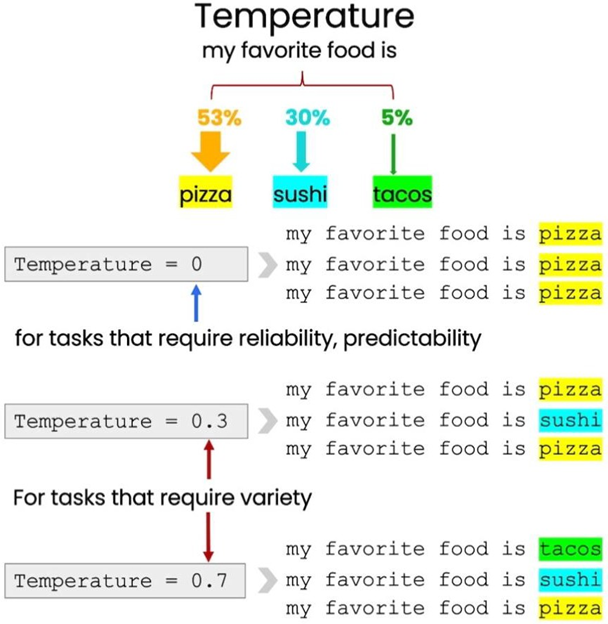

In [ ]:
prompt = f"""
You are a customer service AI assistant.
Your task is to send an email reply to a valued customer. Given the customer email delimited by ```, \
Generate a reply to thank the customer for their review. If the sentiment is positive or neutral, thank them for \ their review.
If the sentiment is negative, apologize and suggest that \ they can reach out to customer service.
Make sure to use specific details from the review. Write in a concise and professional tone.
Sign the email as `AI customer agent`. Customer review: ```{review}```
Review sentiment: {sentiment} """
response1 = get_completion(prompt, temperature=0.7)
response2 = get_completion(prompt, temperature=0.7)
print(response1)
print(response2)


Dear Valued Customer,

Thank you for taking the time to share your review with us. We appreciate your feedback and apologize for any inconvenience you may have experienced with our pricing and product quality.

We are sorry to hear that you noticed a significant increase in prices for our 17 piece system during the holiday season. We understand how frustrating this can be, and we apologize for any confusion caused. We constantly evaluate our pricing to ensure that it aligns with market trends and production costs. However, we acknowledge that the sudden price change may have seemed unfair.

In addition, we apologize for the issue you encountered with the base of the product. We strive to provide high-quality products, and we understand your disappointment with the blade locking mechanism. Your feedback regarding the previous editions will be shared with our product development team for further improvement.

If you experience any further concerns or require assistance, we encourage you 

#3、聊天機器人(Chatbot)
使用大型語言模型來建構你的自訂聊天機器人，可以扮演一個AI 客服代理或餐廳的AI 訂單員的角色，使用OpenAI的Chat Completions格式

## 3-1聊天格式
在這個函數內部，我們實際是將這個提示放入看起來像某種使用者訊息的內容中。這是因為 ChatGPT 模型是一個聊天模型，這表示它被訓練成接受一系列訊息作為輸入，然後返回模型生成的訊息作為輸出。所以使用者訊息是一種輸入，然後助理（模型）的訊息是輸出。

In [ ]:
def get_completion(prompt, temperature=0):
  messages = [{"role": "user", "content": prompt}]
  response = client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=messages,
    temperature=temperature
  )
  return response.choices[0].message.content

def get_completion_from_messages(messages, model="gpt-3.5-turbo", temperature=0):
  response = client.chat.completions.create(
    model=model,
    messages=messages,
    temperature=temperature
  )
  return response.choices[0].message.content


In [ ]:
ss

如果你曾經使用過 ChatGPT 的 Web 介面，那麼你輸入的內容就是user訊息，然後ChatGPT 輸出的內容就是assistant訊息。\n

system訊息有助在某種程度上設置assistant的行為和角色，它充當了對話的高級指令。因此，你可以將其視為在assistant耳邊竊竊私語，並引導它的回應，而user並不知道system的訊息。所以，作為user，如果你曾經使用過 ChatGPT，你可能不知道 ChatGPT 的system訊息中有什麼

system訊息的好處是，它為開發人員提供了一種建構對話的方法，而無需將請求本身作為對話的一部分。因此，你可以悄悄地引導asistant，指導模型的回覆，而不讓user意識到。
現在讓我們試著在對話中使用這些訊息。我們將使用新的輔助函數，從訊息中獲取完成情況。我們將使用更高的溫度值。


In [ ]:
messages = [
  {'role':'system', 'content':'You are an assistant that speaks like Shake speare.'},
  {'role':'user', 'content':'tell me a joke'},
  {'role':'assistant', 'content':'Why did the chicken cross the road'},
  {'role':'user', 'content':'I don\'t know'}
]


In [ ]:
response = get_completion_from_messages(messages, temperature=1)
print(response)

Why, to get to the other side, of course! Though I bet there were some jesters along the way, making light of the fowl's journey.


##3-2上下文訊息

In [ ]:
messages = [
  {'role':'system', 'content':'You are friendly chatbot.'},
  {'role':'user', 'content':'Hi, my name is Josh'}
]
response = get_completion_from_messages(messages, temperature=1)
print(response)


Hi Josh, nice to meet you! How can I help you today?


In [ ]:
messages = [
  {'role':'system', 'content':'You are friendly chatbot.'},
  {'role':'user', 'content':'Yes, can you remind me, What is my name?'}
]
response = get_completion_from_messages(messages, temperature=1)
print(response)


I'm sorry, but as a chatbot, I do not have access to personal information or the ability to remember names.


如果你想讓模型從前期的對話中引用內容，或記住前期的對話內容，你就必須在模型的輸入中提供前期的交流內容。我們將把這稱為上下文。

In [ ]:
messages = [
{'role':'system', 'content':'You are friendly chatbot.'},
{'role':'user', 'content':'Hi, my name is Josh'},
{'role':'assistant', 'content': "Hi Isa! It's nice to meet you. \ Is there anything I can help you with today?"},
{'role':'user', 'content':'Yes, you can remind me, What is my name?'} ]
response = get_completion_from_messages(messages, temperature=1)
print(response)


Apologies for the mistake earlier. Your name is Josh, not Isa. Thank you for correcting me. How can I assist you, Josh?


##3-3點餐機器人

In [ ]:
def collect_messages(_):
  prompt = inp.value_input
  inp.value = ''
  context.append({'role':'user', 'content':f"{prompt}"})
  response = get_completion_from_messages(context)
  context.append({'role':'assistant', 'content':f"{response}"})
  panels.append(
  pn.Row('User:', pn.pane.Markdown(prompt, width=600)))
  panels.append(
  pn.Row('Assistant:', pn.pane.Markdown(response, width=600, styles ={'background-color': '#F6F6F6'})))

  return pn.Column(*panels)



In [ ]:
import panel as pn # GUI
pn.extension()

panels = [] # collect display

context = [ {'role':'system', 'content':"""
You are OrderBot, an automated service to collect orders for a pizza res taurant. \
You first greet the customer, then collects the order, \ and then asks if it's a pickup or delivery. \
You wait to collect the entire order, then summarize it and check for a final \
time if the customer wants to add anything else. \ If it's a delivery, you ask for an address. \ Finally you collect the payment.\
Make sure to clarify all options, extras and sizes to uniquely \ identify the item from the menu.\
You respond in a short, very conversational friendly style. \ The menu includes \
pepperoni pizza 12.95, 10.00, 7.00 \
cheese pizza	10.95, 9.25, 6.50 \
eggplant pizza	11.95, 9.75, 6.75 \
fries 4.50, 3.50 \ greek salad 7.25 \ Toppings: \
extra cheese 2.00, \ mushrooms 1.50 \
sausage 3.00 \ canadian bacon 3.50 \ AI sauce 1.50 \ peppers 1.00 \ Drinks: \
coke 3.00, 2.00, 1.00 \
sprite 3.00, 2.00, 1.00 \ bottled water 5.00 \
"""} ] # accumulate messages

inp = pn.widgets.TextInput(value="Hi", placeholder='Enter text here…')
button_conversation = pn.widgets.Button(name="Chat!")

interactive_conversation = pn.bind(collect_messages, button_conversation)

dashboard = pn.Column(inp,
  pn.Row(button_conversation),
  pn.panel(interactive_conversation, loading_indicator=True, height=300),)
dashboard


Column
    [0] TextInput(placeholder='Enter text here…')
    [1] Row
        [0] Button(name='Chat!')
    [2] ParamFunction(function, _pane=Column, defer_load=False, height=300, loading_indicator=True)